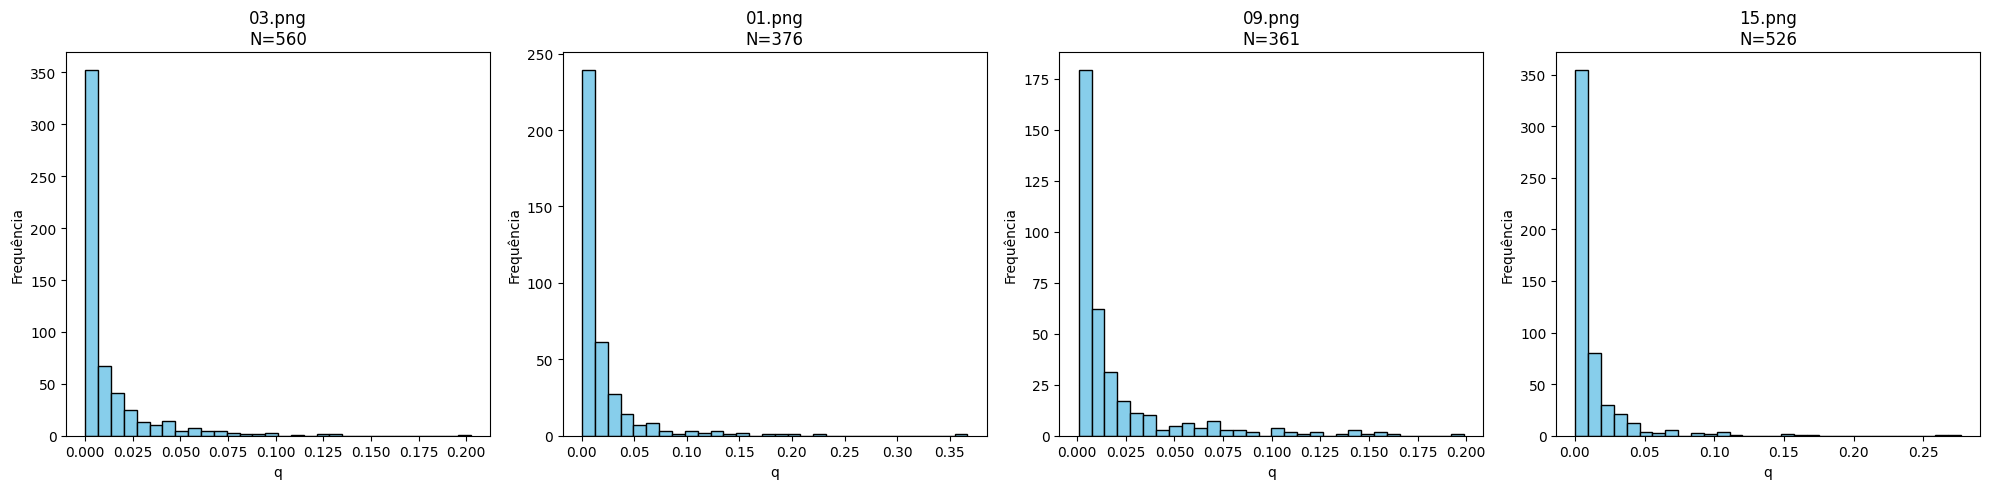

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd

# Caminho do JSON com os contornos e valores de q
json_path = "dataset_contours_aggregate_512.json"

# Carrega os dados
with open(json_path, 'r') as f:
    contours_data = json.load(f)

# Lista de imagens disponíveis no JSON
image_keys = list(contours_data.keys())

# Seleciona aleatoriamente 4 imagens para plot
selected_images = random.sample(image_keys, 4)

# Cria subplots 1 linha, 4 colunas
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for i, image_name in enumerate(selected_images):
    q_values = [contour['q'] for contour in contours_data[image_name].values()]
    
    axes[i].hist(q_values, bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(f"{image_name}\nN={len(q_values)}")
    axes[i].set_xlabel('q')
    axes[i].set_ylabel('Frequência')

plt.tight_layout()
plt.show()


In [2]:
# Lista para armazenar os resultados estatísticos
stats = []

for image_name in image_keys:
    q_values = [contour['q'] for contour in contours_data[image_name].values()]
    mean_q = np.mean(q_values)
    std_q = np.std(q_values)
    stats.append({
        "imagem": image_name,
        "n_contornos": len(q_values),
        "media_q": mean_q,
        "desvio_padrao_q": std_q,
        "min_q": np.min(q_values),
        "max_q": np.max(q_values)
    })

# Cria um DataFrame com os resultados
df_stats = pd.DataFrame(stats)

print(df_stats)

df_stats.to_excel("estatisticas_q_512.xlsx", index=False)


    imagem  n_contornos   media_q  desvio_padrao_q     min_q     max_q
0   01.png          376  0.019914         0.035963  0.000549  0.366779
1   02.png          321  0.016825         0.017786  0.000490  0.140455
2   03.png          560  0.013018         0.022020  0.000185  0.202332
3   04.png          339  0.018805         0.029221  0.000000  0.273422
4   05.png          426  0.017724         0.028186  0.000824  0.265471
5   06.png          435  0.016242         0.025659  0.000772  0.262079
6   07.png          355  0.020346         0.034447  0.001209  0.338791
7   08.png          371  0.019273         0.028380  0.001324  0.217524
8   09.png          361  0.020618         0.031978  0.000864  0.198921
9   10.png          364  0.019660         0.023598  0.000788  0.152519
10  11.png          322  0.020741         0.029495  0.001194  0.218018
11  12.png          323  0.019496         0.024394  0.001293  0.149693
12  13.png          568  0.012936         0.023783  0.000441  0.207371
13  14

N total de contornos: 7038
Média q: 0.016826
Desvio padrão q: 0.027199
Range q: de 0.000185 até 0.366779


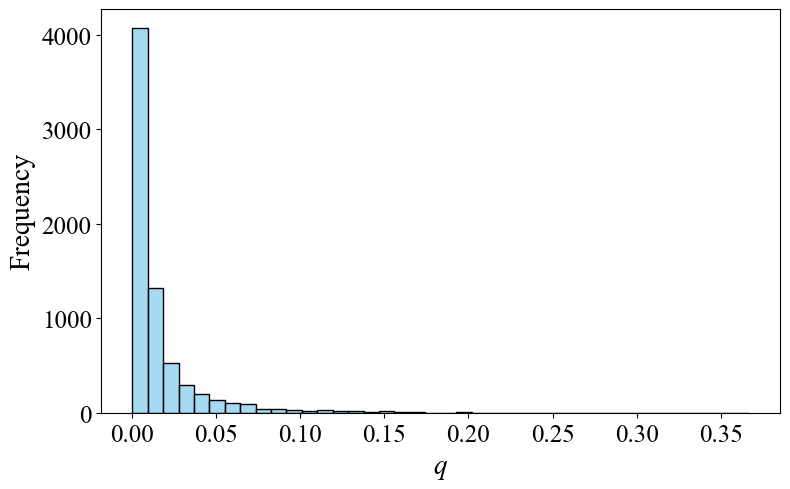

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que você já tenha contours_data e image_keys carregados
# Aqui vamos extrair todos os valores de q em uma única lista
q_all = []

for image_name in image_keys:
    q_vals = [contour['q'] for contour in contours_data[image_name].values()]
    q_all.extend(q_vals)

q_all = np.array(q_all)
q_all = q_all[q_all > 0]  # remove valores negativos ou zero, se existirem

# Estatísticas básicas
media_q = np.mean(q_all)
desvio_q = np.std(q_all)
min_q, max_q = np.min(q_all), np.max(q_all)
n_total = len(q_all)

print(f"N total de contornos: {n_total}")
print(f"Média q: {media_q:.6f}")
print(f"Desvio padrão q: {desvio_q:.6f}")
print(f"Range q: de {min_q:.6f} até {max_q:.6f}")

# Configurações globais de estilo
plt.rcParams.update({
    "font.family": "Times New Roman",  # Fonte
    "axes.labelsize": 20,              # Tamanho dos rótulos dos eixos
    "xtick.labelsize": 18,             # Tamanho dos valores do eixo x
    "ytick.labelsize": 18              # Tamanho dos valores do eixo y
})

# Geração da Figura 2
plt.figure(figsize=(8, 5))
sns.histplot(q_all, bins=40, kde=False, color='skyblue', edgecolor='black')
plt.xlabel("q", style='italic')
plt.ylabel("Frequency")
plt.tight_layout()
# plt.savefig("q_hist_all_dataset.png", format='png', dpi=600)
plt.show()


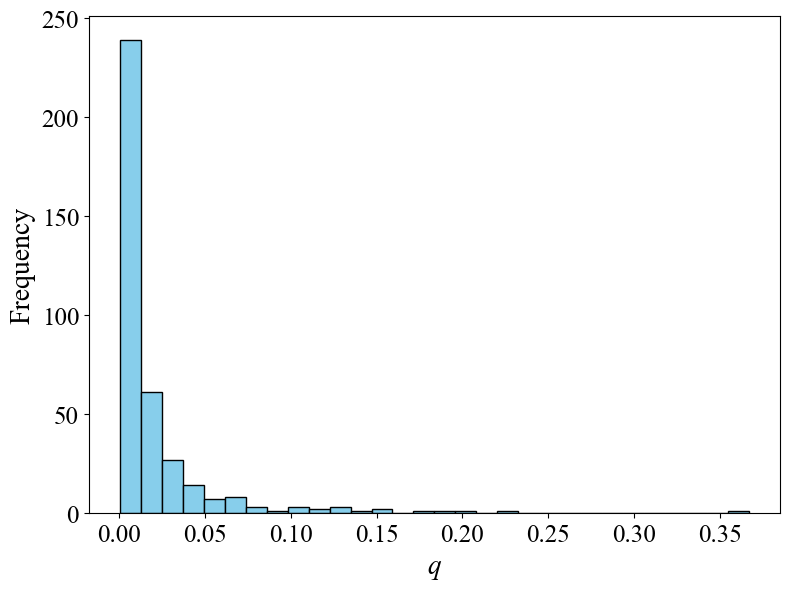

In [4]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Configurações globais de estilo
plt.rcParams.update({
    "font.family": "Times New Roman",  # Fonte
    "axes.labelsize": 20,              # Tamanho dos rótulos dos eixos
    "xtick.labelsize": 18,             # Tamanho dos valores do eixo x
    "ytick.labelsize": 18              # Tamanho dos valores do eixo y
})


# Carrega os dados
with open(json_path, 'r') as f:
    contours_data = json.load(f)

# Nome da imagem a ser usada
image_name = "01.png"

# Extrai os valores de q
q_values = [contour['q'] for contour in contours_data[image_name].values()]

# Cria a figura
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(q_values, bins=30, color='skyblue', edgecolor='black')
ax.set_xlabel('q', style='italic')
ax.set_ylabel('Frequency')

plt.savefig(f"fig_sample_hist.png", format='png', dpi=600)

plt.tight_layout()
plt.show()
